## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

## Load Dataset

In [2]:
df = pd.read_csv("heart.csv")
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
df.corr().output

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

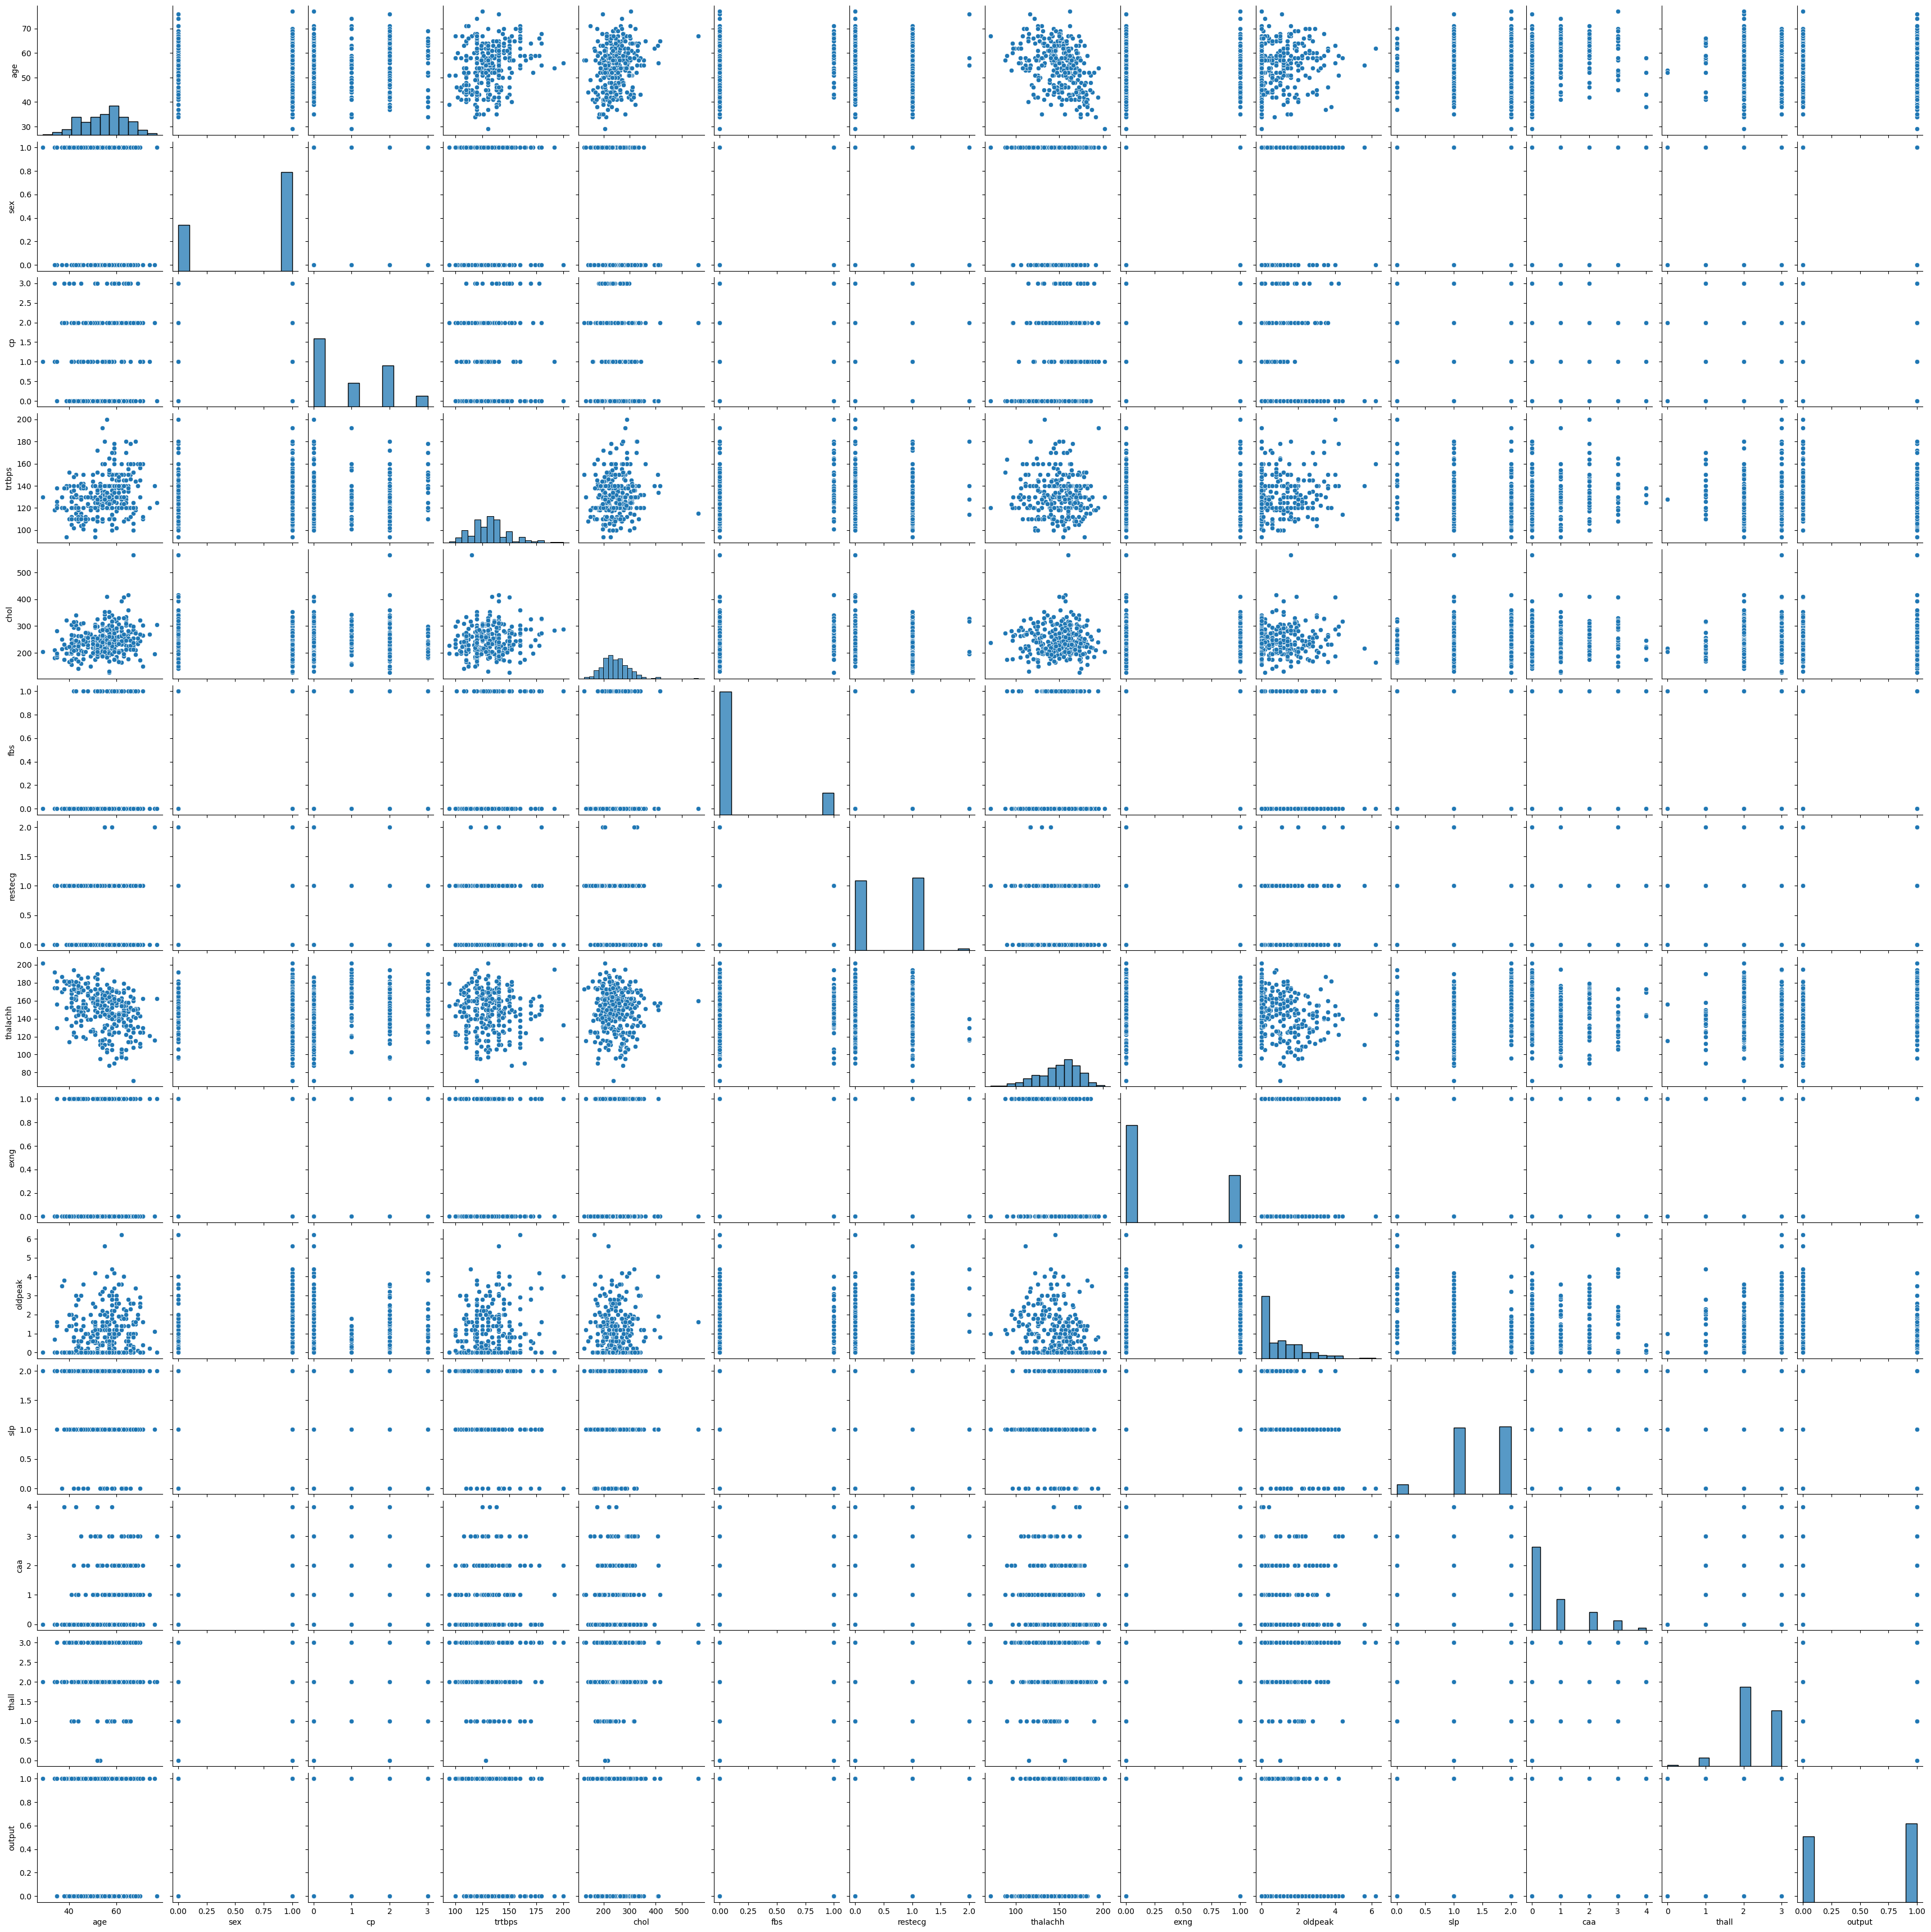

In [6]:
sb.pairplot(df)
plt.show()

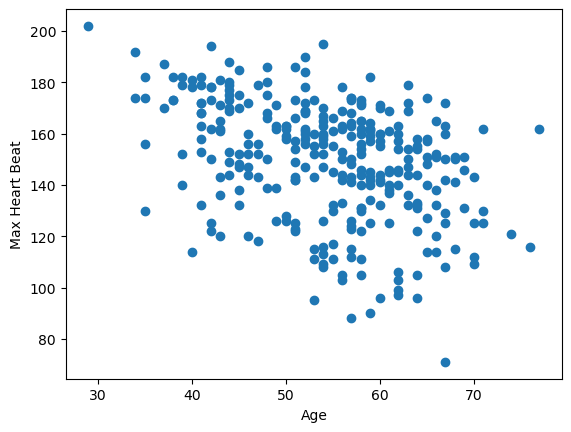

In [7]:
plt.scatter(df.age, df.thalachh)
plt.xlabel("Age")
plt.ylabel("Max Heart Beat")
plt.show()

In [8]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

## Data Preprocessing

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Train and Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 4)

In [14]:
X_train.shape

(242, 13)

## Train the Model with different Algorithms

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools

def draw_confusion_matrix():
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=df.output.unique())
    np.set_printoptions(precision=2)

    print (classification_report(y_test, y_pred))

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['High(1)','Low(0)'],normalize= False,  title='Confusion matrix')

### Train using KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Ks = 10
mean_acc = np.zeros((Ks - 1))

for k in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors= k).fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    
    mean_acc[k - 1] = accuracy_score(y_test, y_pred)
print(mean_acc)
print("The best accuracy is: ", mean_acc.max(), "With K: ", mean_acc.argmax() + 1)

[0.7704918  0.7704918  0.80327869 0.80327869 0.80327869 0.81967213
 0.83606557 0.81967213 0.81967213]
The best accuracy is:  0.8360655737704918 With K:  7


/Users/sasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.88      0.83      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix, without normalization
[[30  6]
 [ 4 21]]


/Users/sasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


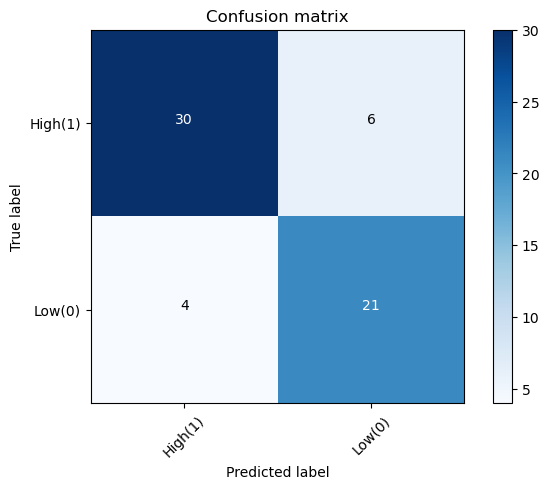

In [19]:
neigh = KNeighborsClassifier(n_neighbors= (mean_acc.argmax() + 1)).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
draw_confusion_matrix()

### Train using Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth = 8
mean_acc = np.zeros((depth - 1))
for d in range(1, depth):
    dtree = DecisionTreeClassifier(criterion= "entropy", max_depth=d)
    dtree.fit(X_train, y_train)
    
    y_pred = dtree.predict(X_test)
    mean_acc[d - 1] = accuracy_score(y_test, y_pred)
    
print(mean_acc)
print("The best accuracy is: ", mean_acc.max(), "With Depth: ", mean_acc.argmax() + 1)

[0.8  0.74 0.85 0.85 0.8  0.8  0.85]
The best accuracy is:  0.8524590163934426 With Depth:  3


/Users/sasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.88      0.83      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix, without normalization
[[30  6]
 [ 4 21]]


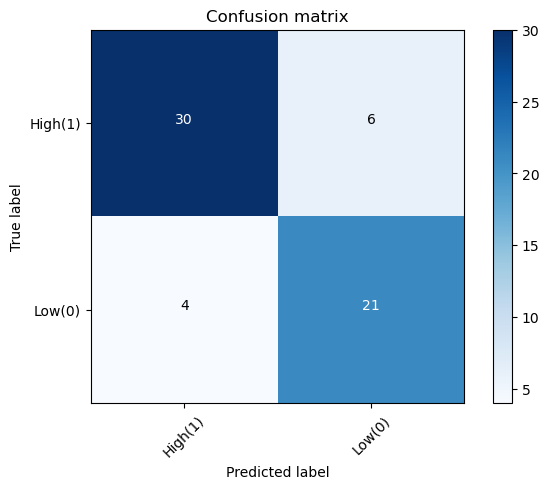

In [21]:
dtree = DecisionTreeClassifier(criterion= "entropy", max_depth=(mean_acc.argmax() + 1))
dtree.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
draw_confusion_matrix()

### Train using SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ["linear", "poly", "rbf", "sigmoid"]
mean_acc = np.zeros((len(kernels)))
index = 0
for kernel in kernels:
    svc = SVC(kernel= kernel).fit(X_train, y_train)
    
    y_pred = svc.predict(X_test)
    mean_acc[index] = accuracy_score(y_test, y_pred)
    index += 1

print(mean_acc)
print("The best accuracy is: ", mean_acc.max(), "With Kernel: ", kernels[mean_acc.argmax()])

[0.9  0.8  0.87 0.89]
The best accuracy is:  0.9016393442622951 With Kernel:  linear


              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[32  4]
 [ 2 23]]


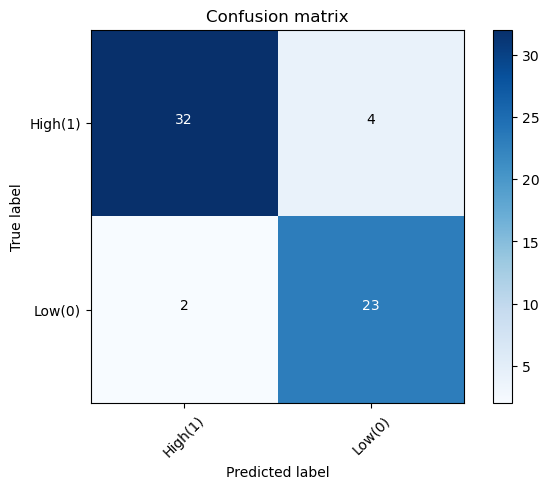

In [23]:
svc = SVC(kernel= kernels[mean_acc.argmax()]).fit(X_train, y_train)
y_pred = svc.predict(X_test)
draw_confusion_matrix()

### Train using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

steps = np.arange(0.1, 1, 0.1)
mean_acc = np.zeros((len(steps)))
index = 0

for step in steps:
    LR = LogisticRegression(C=step, solver='liblinear').fit(X_train,y_train)

    y_pred = LR.predict(X_test)
    mean_acc[index] = accuracy_score(y_test, y_pred)
    index += 1

print(mean_acc)
print("The best accuracy is: ", mean_acc.max(), "With Step: ", steps[mean_acc.argmax()])

[0.89 0.9  0.9  0.9  0.9  0.9  0.89 0.89 0.87]
The best accuracy is:  0.9016393442622951 With Step:  0.2


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.92      0.92      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[33  3]
 [ 3 22]]


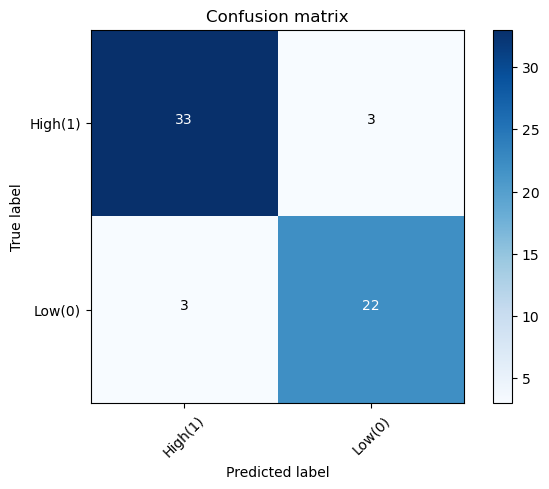

In [25]:
LR = LogisticRegression(C=steps[mean_acc.argmax()], solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
draw_confusion_matrix()